In [1]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
from uszipcode import SearchEngine
import mpu

/Users/danielmartinalarcon/code/als_equity/.venv/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Turn maps into geopandas dataframes
cal_counties = geopandas.read_file('maps/ca_counties/county_ca.geojson')
usa = geopandas.read_file('maps/states/states.geojson')
cal_state = usa[usa['NAME'] == "California"]

In [11]:
# Get the coordinates of each zipcode,
zips = pd.read_csv('local_only/zips.csv', header=None)[0]

search = SearchEngine()
lats = []
lngs = []
for z in zips:
    coords = search.by_zipcode(z)
    lats.append(coords.lat)
    lngs.append(coords.lng)
    
locations = pd.DataFrame({
    'zipcode':zips,
    'latitude':lats,
    'longitude':lngs,
})

In [12]:
locations.head(3)

,zipcode,latitude,longitude
0,86001,35.23,-111.72
1,94578,37.70,-122.12
2,95060,37.04,-122.10


In [13]:
# Create a Geopandas DataFrame from the list of locations
from geopandas import GeoDataFrame
from geopandas import points_from_xy

df = locations.copy()
lat = df['latitude']
lon = df['longitude']
geo_locs = GeoDataFrame(df, geometry=points_from_xy(lon, lat))

In [14]:
geo_locs

,zipcode,latitude,longitude,geometry
0,86001,35.23,-111.72,POINT (-111.72000 35.23000)
1,94578,37.70,-122.12,POINT (-122.12000 37.70000)
2,95060,37.04,-122.10,POINT (-122.10000 37.04000)
3,95019,36.94,-121.78,POINT (-121.78000 36.94000)
4,95357,37.67,-120.89,POINT (-120.89000 37.67000)
...,...,...,...,...
303,95360,37.28,-121.20,POINT (-121.20000 37.28000)
304,95409,38.45,-122.59,POINT (-122.59000 38.45000)
305,94116,37.74,-122.48,POINT (-122.48000 37.74000)
306,94904,37.94,-122.56,POINT (-122.56000 37.94000)


In [73]:
# Process the clinics in the same way.
clinic_records = [
("Monterey", 93940),
("Modesto", 95350),
("Santa Rosa", 95401),
("Fresno", 93721),
("San Francisco", 94122),]

clinics = pd.DataFrame.from_records(clinic_records, columns=['name', 'zip'])

search = SearchEngine()
lats = []
lngs = []

zips = clinics["zip"]
for z in zips:
    coords = search.by_zipcode(z)
    lats.append(coords.lat)
    lngs.append(coords.lng)
    
clinic_coords = pd.DataFrame({
    'name':clinics["name"],
    'zipcode':zips,
    'latitude':lats,
    'longitude':lngs,
})

df = clinic_coords.copy()
lat = df['latitude']
lon = df['longitude']
clinics_geo = GeoDataFrame(df, geometry=points_from_xy(lon, lat))

In [74]:
clinics_geo

,name,zipcode,latitude,longitude,geometry
0,Monterey,93940,36.60,-121.88,POINT (-121.88000 36.60000)
1,Modesto,95350,37.67,-121.01,POINT (-121.01000 37.67000)
2,Santa Rosa,95401,38.44,-122.78,POINT (-122.78000 38.44000)
3,Fresno,93721,36.73,-119.78,POINT (-119.78000 36.73000)
4,San Francisco,94122,37.76,-122.48,POINT (-122.48000 37.76000)


In [75]:
clinics_geo[clinics_geo['name']=="San Francisco"]

,name,zipcode,latitude,longitude,geometry
4,San Francisco,94122,37.76,-122.48,POINT (-122.48000 37.76000)


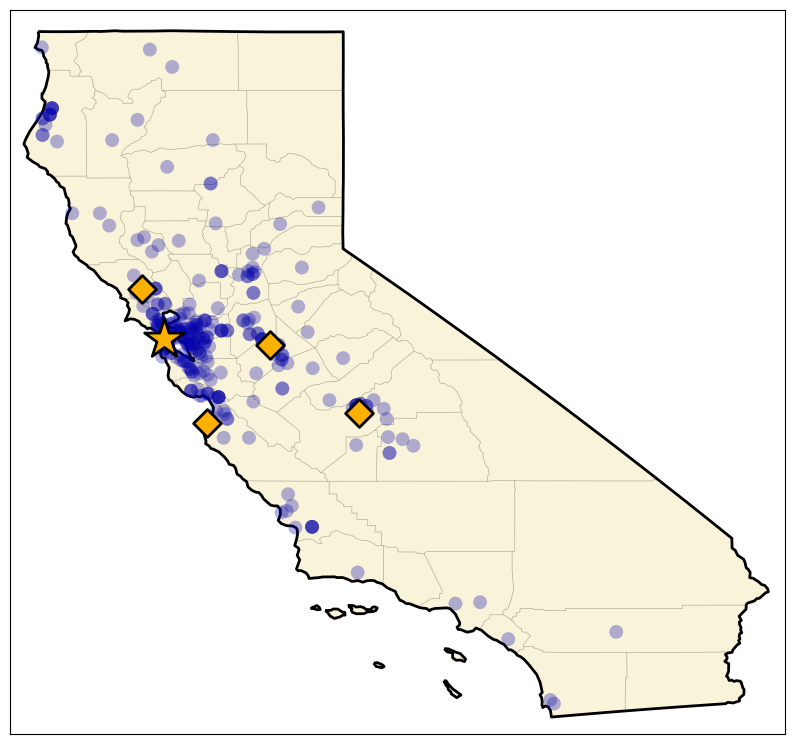

In [85]:
# Plot the map

for i in [1]:
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    cal_counties.plot(ax=ax, color='#dbb40c', edgecolor='black', linewidth=0.5, alpha=0.15)
    cal_state.plot(ax=ax, color='none', edgecolor='black', linewidth=2)

    # Plot the zipcode centers
    geo_locs['geometry'].plot(ax=ax, color='#0504aa', 
                markersize=100, alpha=0.3, edgecolor='none')

    # Plot the clinics
    sf_clinic = clinics_geo[clinics_geo['name']=="San Francisco"]
    sf_clinic['geometry'].plot(ax=ax, color='#fcb001', marker="*",
                markersize=900, alpha=1, edgecolor='k', linewidth=2)
    
    other_clinic = clinics_geo[clinics_geo['name']!="San Francisco"]
    other_clinic['geometry'].plot(ax=ax, color='#fcb001', marker="D",
                markersize=200, alpha=1, edgecolor='k', linewidth=2)

    # Remove ticks and lat/lon labels
    ax.tick_params(
        axis='both', bottom=False, left=False,         
        labelbottom=False, labelleft=False) 
    # Sets figure limits
    ax.set_xlim(-124.6, -113.9);
    ax.set_ylim(32.3, 42.3);

In [84]:
fig.savefig('CA')